In [1]:
%run ../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Sigmoid neuron

Most of the material in this notebook has been re-elaborated from the great book by M Nielsen [[1]](#book).

## What is: definition and relation to the perceptron

A sigmoid neuron (sometimes called *logistic neuron*) is one which has three main differences with respect to a [perceptron](perceptron.ipynb):

* it allows for non-binary input values, which means the values $(x_1, x_2, \ldots, x_n)$ with which it is fed are real numbers between 0 and 1;
* its output function is not a step but a sigmoid (logistic function);
* as a consequence, the output is also non binary but real

The transfer function is the same as in the case of the perceptron, $\mathbf{w} \cdot \mathbf{x} + b$, where $\mathbf{w}$ are the weights, $\mathbf{x}$ the input values and $b$ the bias. The output function is instead

$$
f(\mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}} \ ,
$$

and this allows for small updates to the input to translate into small updates to the output, a thing that is difficult to achieve with a perceptron where due to the differences explained above small changes to the weights in input produce not-so-small output results. 

The logistic function looks like this:

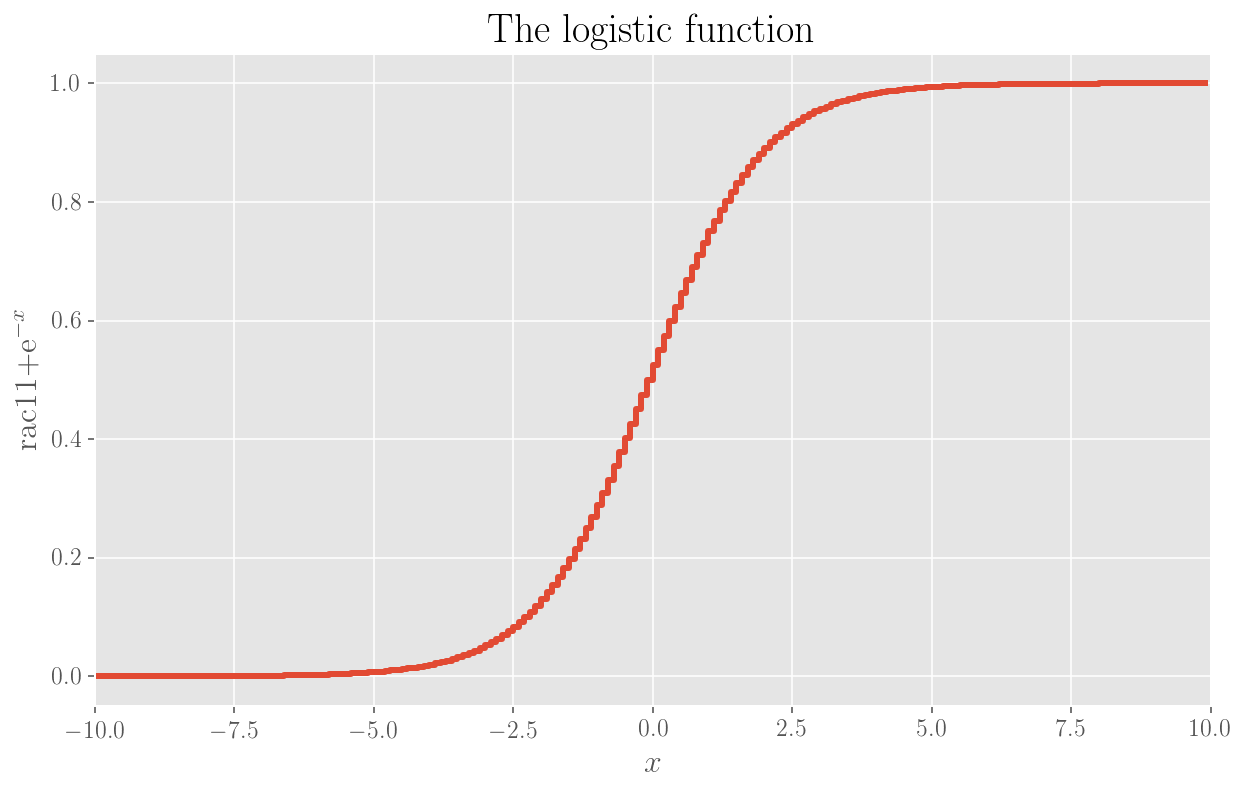

In [2]:
x = np.arange(-10, 10, 0.1)

plt.step(x, 1/(1 + np.exp(-x)))
plt.xlim(-10, 10)
plt.xlabel('$x$')
plt.ylabel('$\frac{1}{1+e^{-x}}$')
plt.title('The logistic function')
plt.show();

The output of a sigmoid collapses onto that of a perceptron in the two extreme cases

* $\mathbf{w} \cdot \mathbf{x} + b \to \infty$, where $f(x) \to 1$ (same as in the case of a large transfer function in the perceptron)
* $\mathbf{w} \cdot \mathbf{x} + b \to -\infty$, where $f(x) \to 0$ (same as in the case of a negative transfer function in the perceptron)

From the shape of the sigmoid function in figure it's clear that such an output is continuous version of the perceptron output. 

### A note on notation

Note that if we assume a $x_0=1$ and use the bias as a further weight, we can write the transfer function as $\mathbf{w} \cdot \mathbf{x}$ where $\mathbf{w} = (b, w_1, w_2, \ldots, w_n)$ and $\mathbf{x} = (x_0, x_1, x_2, \ldots, x_n)$.

## A learning neuron

The smart thing about sigmoids is that you can instruct them to learn quite nicely. 

*What is learning?* Very good question, and I doubt I'd ever find a good answer. But let's forget about humans for now; in the case of a network of artificial neurons it means that through a process of tuning of the inputs (the weights and the bias) you can make it spits out what you want. Sigmoids do allow for this quite nicely. In fact, a variation in the input weights and bias produces a variation in the output which computes as

$$
\delta f = \sum \frac{\partial f}{\partial w} \delta w + \frac{\partial f}{\partial x} \delta x \ ,
$$

which means the variation in the output is a linear function of the variations in the input. This is what makes learning feasible as you can tune the input iteratively to make for the output you want. A sigmoid neuron can be taught to learn in this very simple way: fine tuning the weights and the bias you can obtain the desired output. in the case of the perceptron, due to the step nature of the output function, this wouldn't be possible this way: you could of course tune the weights and the bias to make the neuron spit the desired output (and you also have just binary possibilities for it) but you have very limited in what you can do and in the way to do it.

## References

1. <a name="book"></a> M Nielsen, [**Neural networks and deep learning**](http://neuralnetworksanddeeplearning.com/chap1.html#sigmoid_neurons), Determination Press, 2015